## Problem Statement
### Boom BikesA bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to k    now:

1) Which variables are significant in predicting the demand for share    d bikes
2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on so factors.




### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

The steps to be followed in this exercise are as follows:
Reading, understanding and visualizing the data

In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# converting the dteday column to standard datetime
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [4]:
# checking the statistics of the dataframe
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [5]:
# checking for outliers in the data
# creating a function that creates a boxplot

numeric_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
def boxplotter(col):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=col, data=df)
    plt.title(f"Box plot for {col}")
    plt.show()

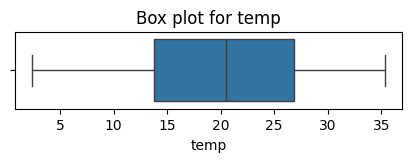

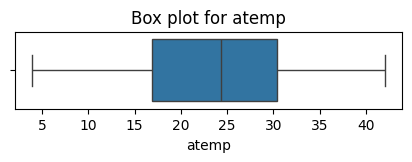

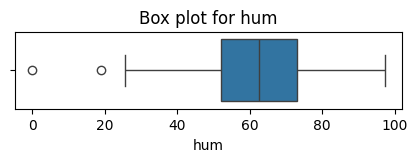

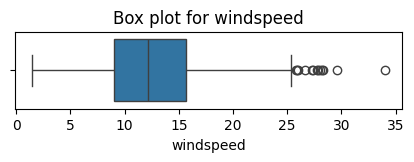

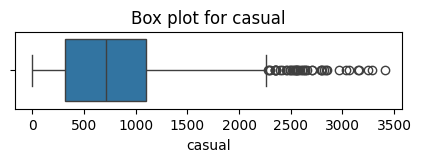

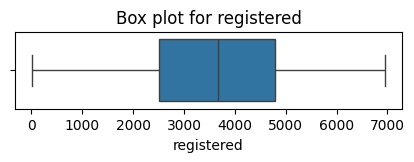

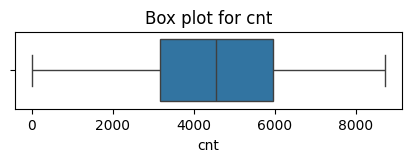

In [6]:
# running the boxplot for numeric cols
for i in numeric_cols:
    boxplotter(i)

### Data Correctness
For the given dataset we will check if the data provided is correct or not 

In [7]:
# there are somoe columns like "casual" and "windspeed" that has outliers in the datset. 
# Before checking the same, let's first check if the data is correct or not for the column "cnt"

df[df['cnt'] != (df['casual'] + df['registered'])].shape

(0, 16)

### Data Visualization and EDA
Using Pair Plot for variables to check the dependency and colinearity of all variables in the dataset

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


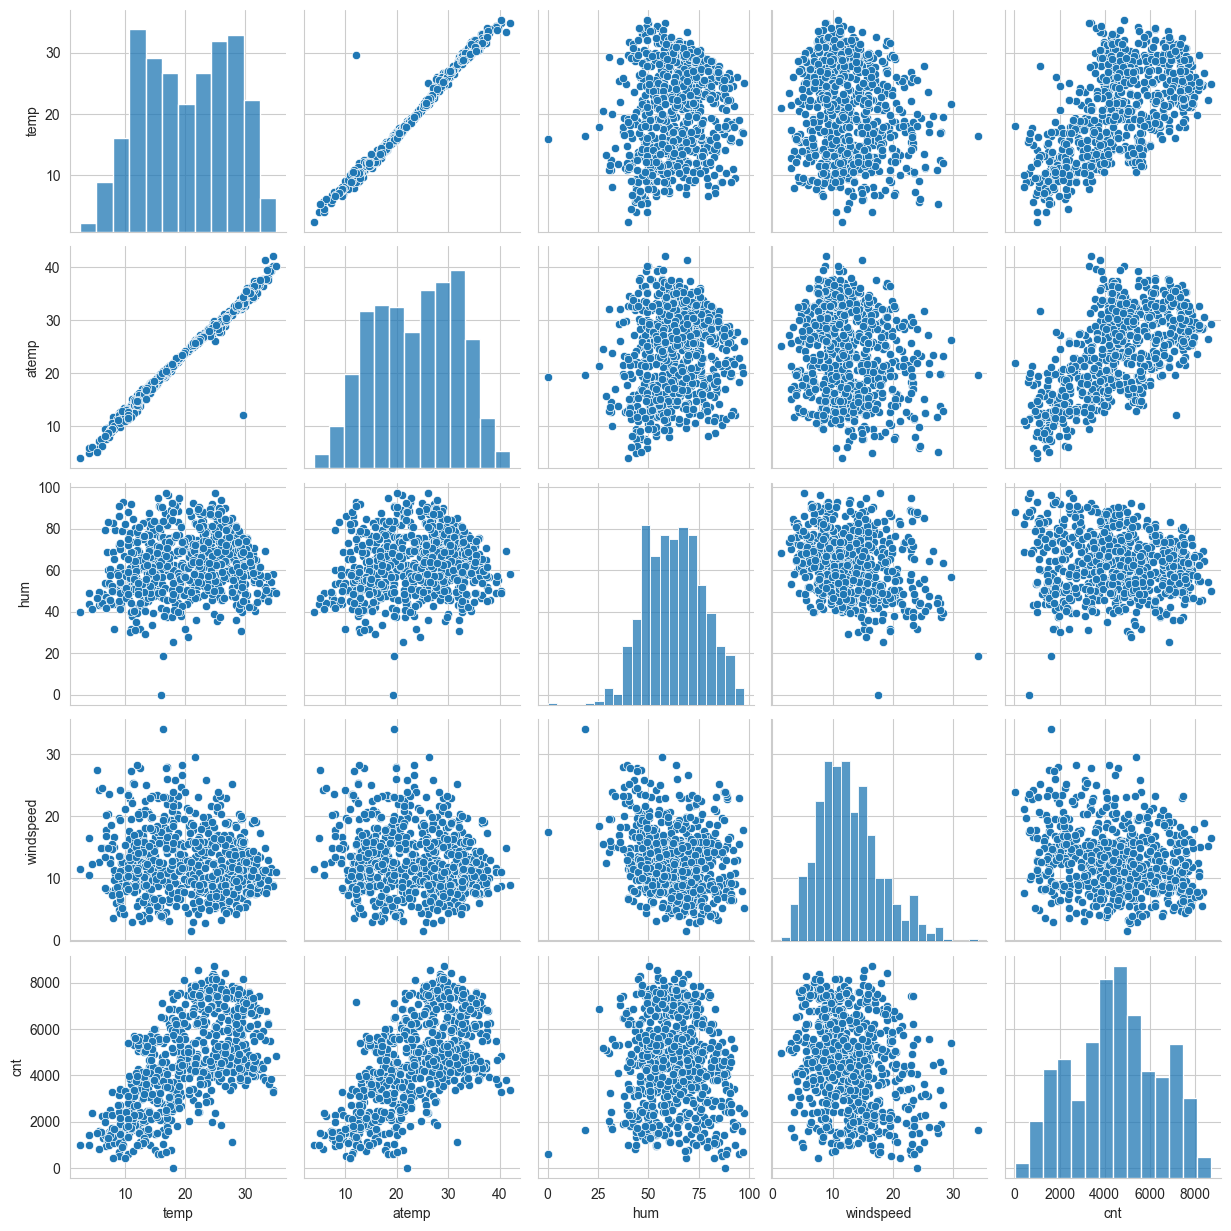

In [48]:
# plotting the pair plot
sns.pairplot(data=df.drop(labels=['instant','dteday','casual','registered','season','yr','mnth','holiday','weekday','workingday', 'weathersit'], axis=1))
plt.show()

### Observations:
a. From the pair plot, the variables "temp" and "atemp" seem to have somewhat linear dependence with the the target variable
b. The "temp" and "atemp" variable have a strong linearity with each other. While model building we will take any one of the variable

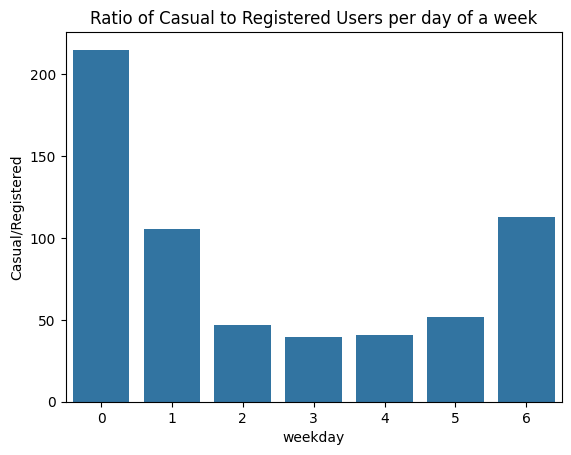

In [10]:
# create a gropued dataframe by the working day to to count bikes taken at individual days of the week
df_days = df.groupby(['weekday'])[['casual','registered']].sum().reset_index()
df_days['Ratio'] = df_days['casual']/df['registered']

# creating barplot to understand the ratio of casual to registered users
sns.barplot(x='weekday', y='Ratio', data=df_days)
plt.ylabel("Casual/Registered")
plt.title("Ratio of Casual to Registered Users per day of a week")
plt.show()

### Observations:
a. On weekends the number of casual users far exceeds the number of Registered users.

b. During the mid of the week the ratio dips, meaning not that many casual users than the registered users use the bikes.

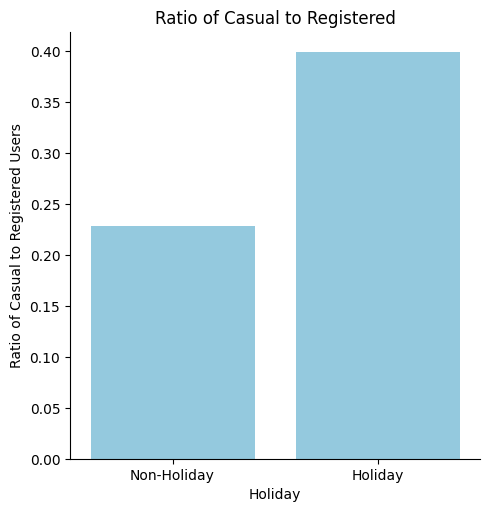

In [11]:
# plotting the variation of bikes count on a holiday
df_holiday = df.groupby(['holiday'])[['casual','registered']].sum().reset_index()
df_holiday['casual/registered'] = df_holiday['casual']/df_holiday['registered']

sns.catplot(x='holiday', y='casual/registered', data=df_holiday, kind='bar', color='skyblue')
plt.xlabel('Holiday')
plt.ylabel('Ratio of Casual to Registered Users')
plt.title('Ratio of Casual to Registered')
plt.xticks(ticks=[0,1], labels=['Non-Holiday','Holiday'])
plt.show()

### Observations:
a. On holidays the number of casual users using the bikes is more as compared to a non-holiday day

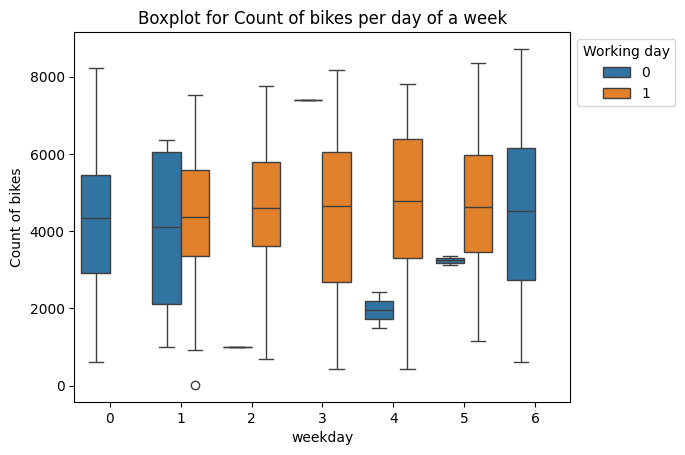

In [12]:
# plotting to check the dependency of "cnt" with "weekday"

sns.boxplot(y='cnt', x='weekday', data=df, hue='workingday')
plt.title("Boxplot for Count of bikes per day of a week", loc='center')
plt.ylabel("Count of bikes")
plt.legend(bbox_to_anchor=(1,1), title="Working day")

plt.show()

### Observations:
a. With Saturdays and Sundays being a non-working day all customers, the users increase indicates a large population of users use the bikes for recreational purposes.

b. For workingdays, generally on wednesdays the number of bikes varies the most compared to other working days

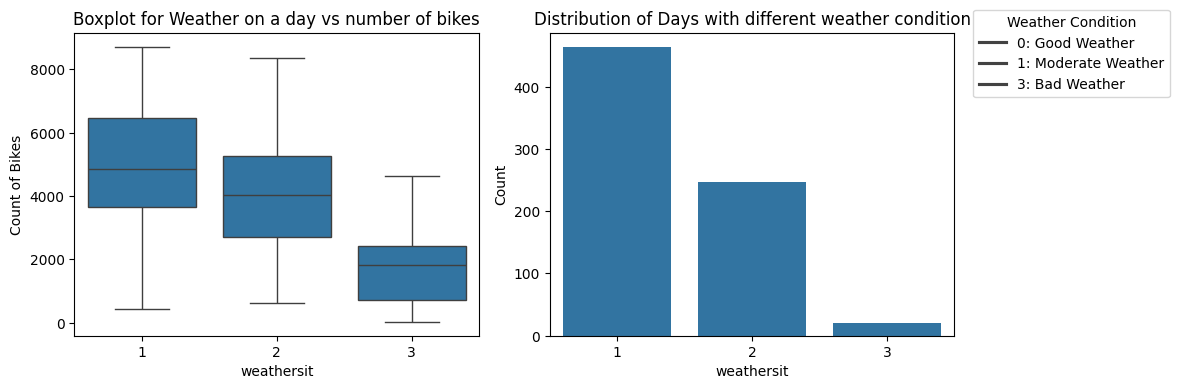

In [13]:
# Analyzing the relevence of weather with the count of bikes
df_weath = pd.DataFrame(data=df['weathersit'].value_counts()).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# plotting a box plot for weather vs count
sns.boxplot(x='weathersit', y='cnt', ax=axes[0], data=df)
axes[0].set_title("Boxplot for Weather on a day vs number of bikes")
axes[0].set_ylabel("Count of Bikes")

# plotting a bar chart to understand the dstribution in detail
sns.barplot(x='weathersit', y='count', data=df_weath, ax=axes[1])
axes[1].set_title("Distribution of Days with different weather condition")
axes[1].set_ylabel("Count")

plt.legend(title = 'Weather Condition',bbox_to_anchor=(1.55, 1.1), labels=['0: Good Weather','1: Moderate Weather','3: Bad Weather'])
plt.tight_layout()
plt.show()

### Observations:
a. With good weather, the number of bikes taken is considerable greater than the days with bad weather.

b. Days with good weather attracts more bikes to be rented when comparing the median number of bikes

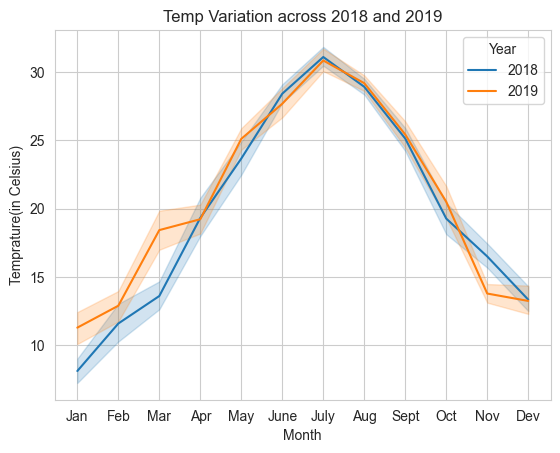

In [14]:
# plotting the temp distribution for the two years
df_2018 = df[df['yr']==0]
df_2019 = df[df['yr']==1]
sns.set_style('whitegrid')
sns.lineplot(y='temp',x='mnth',data=df_2018, label=2018)
sns.lineplot(y='temp',x='mnth',data=df_2019, label=2019)
plt.legend(title='Year')
plt.title("Temp Variation across 2018 and 2019")
plt.xlabel("Month")
plt.ylabel("Temprature(in Celsius)")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct', 'Nov', 'Dev'])
plt.show()

### Observations:
a. The temperatures peaked during the month of July

b. Overall Jan was the month with Least Temp

c. March was considerably hotter in 2019 as compared to 2018

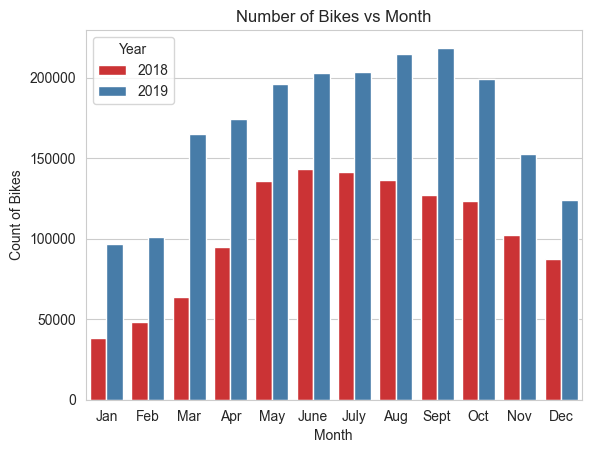

In [15]:
# plotting bikes count month wise vs the temp
df_yr = df.groupby(['yr','mnth'])['cnt'].sum().reset_index()

ax = sns.barplot(x='mnth', y='cnt', data=df_yr, hue='yr', palette='Set1', hue_order=[0, 1], legend=True)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Year', labels=[2018, 2019])
plt.xlabel('Month')
plt.ylabel('Count of Bikes')
plt.title('Number of Bikes vs Month')
plt.show()

### Observations:
a. There have been significant boost in the count of bikes between the year 2018 and 2019.

b. The month of septemeber saw the largest number of people driving the bike.

c. The colder months like Jan, Feb, Dec saw less number of people using the bikes than compared to the hotter months.

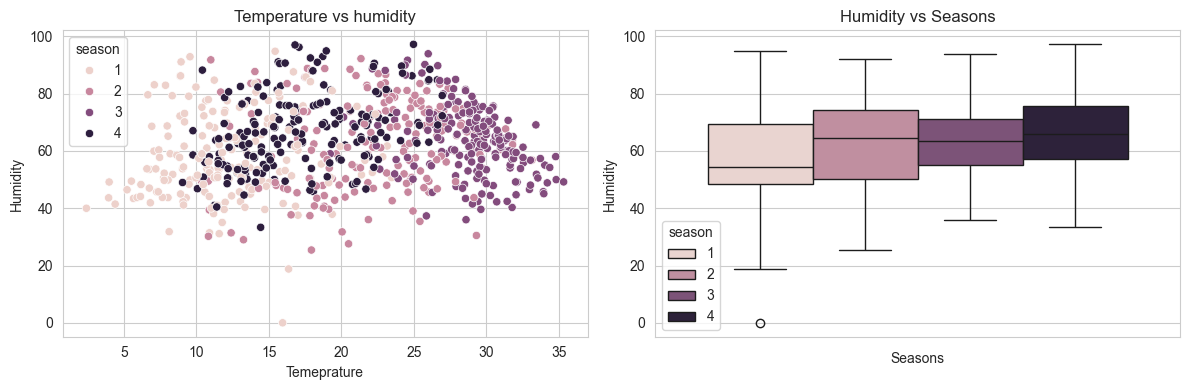

In [16]:
# scatter plot for temp vs humidity
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(y='hum', x='temp',hue='season', data=df, ax=axes[0], legend=True, hue_order=[1,2,3,4])
sns.boxplot(hue='season', y='hum', data=df, ax=axes[1])
axes[0].set_title("Temperature vs humidity")
axes[0].set_xlabel("Temeprature")
axes[0].set_ylabel("Humidity")

axes[1].set_title("Humidity vs Seasons")
axes[1].set_xlabel("Seasons")
axes[1].set_ylabel("Humidity")

plt.tight_layout()
plt.show()

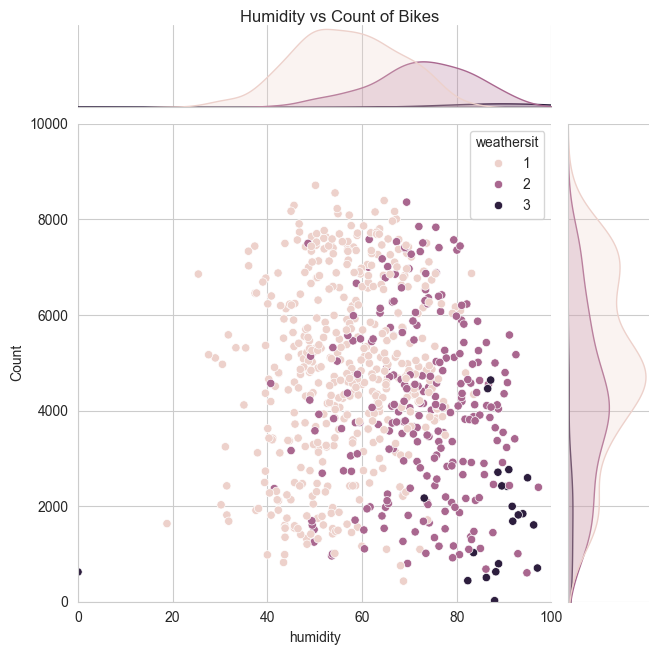

In [17]:
# Understanding variation in count of bikes w.r.t the humidity
sns.jointplot(x='hum', y='cnt',hue='weathersit', data=df, height=6.5)
plt.xlim((0,100))
plt.ylim((0,10000))
plt.xlabel("humidity")
plt.ylabel("Count")
plt.suptitle("Humidity vs Count of Bikes", y=1)
plt.show()

### Observations:
a. Days with more humidity and weather conditions as severe, saw a drop in the total number of bikes used.

b. Days with weather being sunny has low humidity levels and forms the majority of the dataset.

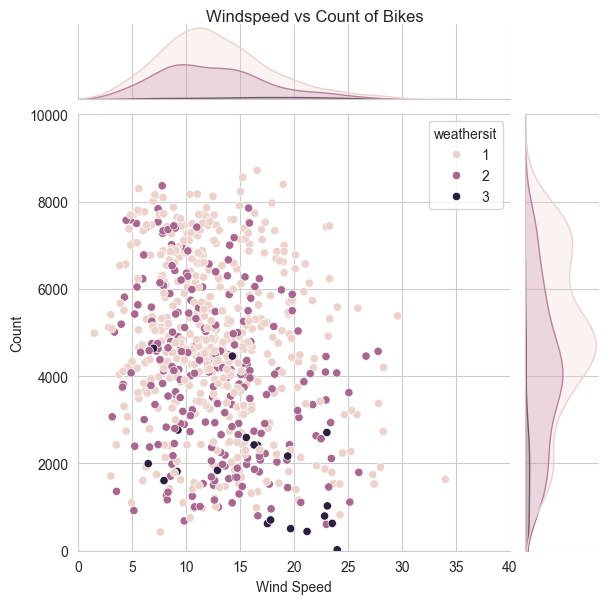

In [18]:
# finding how the windspeed affects the count of bikes in the dataset

sns.jointplot(x='windspeed', y='cnt', data=df, hue='weathersit')
plt.xlim((0,40))
plt.ylim((0,10000))
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.suptitle("Windspeed vs Count of Bikes", y=1)
plt.show()

### Observations:
a. Days with high windspeeds saw a drop in the count of bikes on those particular dates.

b. The distribution of windspeed is right tailed indicating majority of the days, the windspeed lies around 5-20 km/hr.

c. The lower windspeed indicates higher number of bikes count

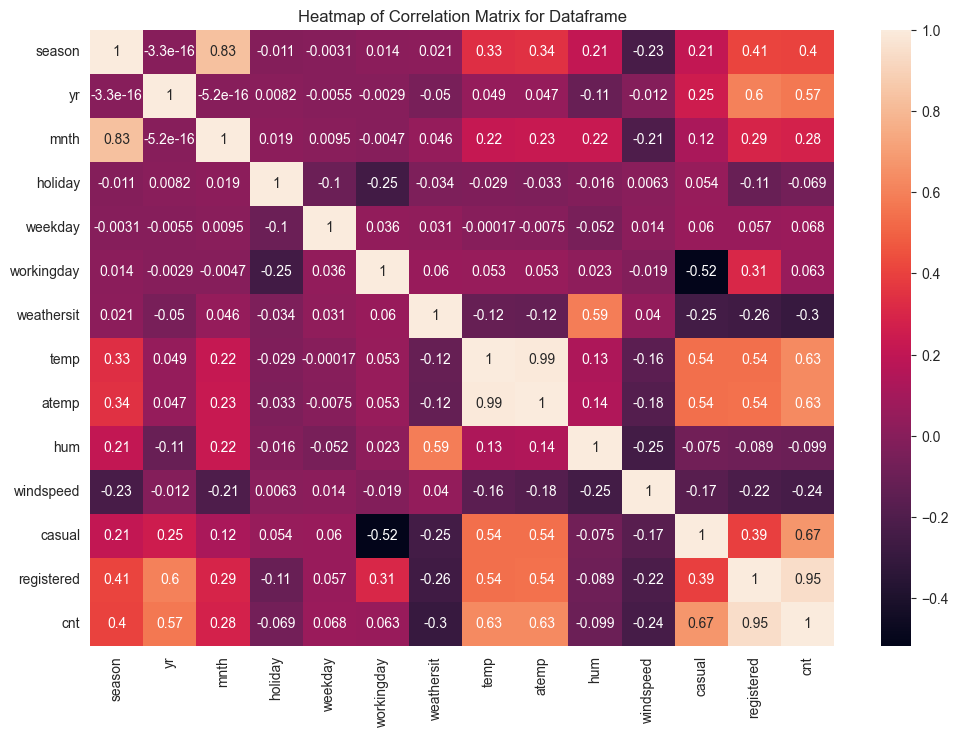

In [19]:
# Generating Heatmap, to look for variable having correlation
mod = df.drop(labels=['instant','dteday'], axis=1)

df_corr = mod.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_corr, annot=True)
plt.title("Heatmap of Correlation Matrix for Dataframe")
plt.show()


### Observations:
a. As expected there is a strong correlation between the "temp" and "atemp" features. So, while model building we will take any one out of the two.

b. There is a strong positive correlation between "season","yr" with target variable.

# Data Processing

## Categorical Variables
The Variable "weathersit" is categorical with 4 values 0, 1, 2, 3, we need to convert the same using dummy variables.
For that, we will need to convert it into categorical variable first, then use dummy variables for the same

In [20]:
df['weathersit'] = df['weathersit'].astype('str')
df['season'] = df['season'].astype('str')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
df_cat = pd.get_dummies(data=df[['weathersit','season']],drop_first=True).astype('int')
df_cat.head()

,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [22]:
df_final = pd.concat([df.drop(labels=['weathersit','season'], axis=1), df_cat], axis=1)
df_final.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


## Model Building
Now, that we have handled the variables, let's proceed into the model building part which includes:

    a. Dropping Irrelevant Columns
    b. Scaling the dataset
    c. Fitting the Linear Regression Model
    d. Iteratively correct the model performance

In [23]:
# Dropping irrelevant columns
df_final.drop(labels=['instant','dteday','casual','registered'], axis=1, inplace=True)
df_final.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [24]:
# Splitting the dataframe into the train and test set
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, train_size=0.7, test_size=0.3, random_state=42)
df_train.shape, df_test.shape

((510, 15), (219, 15))

In [25]:
# Scaling the train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# fit_trasform the dataset
df_scaled = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(data=df_scaled, columns=df_train.columns)
df_train_scaled.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,0.909091,0.0,0.666667,1.0,0.327133,0.322150,0.639330,0.327101,0.605336,1.0,0.0,0.0,0.0,1.0
1,1.0,0.818182,1.0,0.166667,0.0,0.403972,0.404998,0.731215,0.419004,0.609320,1.0,0.0,0.0,0.0,1.0
2,0.0,0.454545,0.0,0.166667,1.0,0.717562,0.685963,0.509660,0.708724,0.554026,0.0,0.0,1.0,0.0,0.0
3,0.0,1.000000,0.0,0.333333,1.0,0.331287,0.326273,0.785745,0.415925,0.088253,1.0,0.0,0.0,0.0,0.0
4,1.0,0.818182,0.0,0.500000,1.0,0.745598,0.682653,0.817947,0.110593,0.862127,1.0,0.0,0.0,0.0,1.0


In [27]:
import statsmodels.api as sm

In [28]:
# Creating X_train and y_train for the datset
X_train = df_train_scaled.drop(labels=['cnt'], axis=1)
y_train = df_train_scaled['cnt']
X_train.shape, y_train.shape

((510, 14), (510,))

In [49]:
# Adding constant term to the dataset
X_train_lr = sm.add_constant(X_train)
X_train_lr.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,1.0,0.909091,0.0,0.666667,1.0,0.327133,0.322150,0.639330,0.327101,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.818182,1.0,0.166667,0.0,0.403972,0.404998,0.731215,0.419004,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.454545,0.0,0.166667,1.0,0.717562,0.685963,0.509660,0.708724,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.000000,0.0,0.333333,1.0,0.331287,0.326273,0.785745,0.415925,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.818182,0.0,0.500000,1.0,0.745598,0.682653,0.817947,0.110593,1.0,0.0,0.0,0.0,1.0


In [30]:
# using OLS(Linear Regression) from statsmodel.api
lr = sm.OLS(y_train, X_train_lr).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          8.25e-177
Time:                        22:49:43   Log-Likelihood:                 461.72
No. Observations:                 510   AIC:                            -893.4
Df Residuals:                     495   BIC:                            -829.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1184      0.034      3.488      0.001       0.052       0.185
yr               0.2383      0.009     26.686      0.000       0.221       0.256
mnth            -0.0463      0.026     -1.763      0.079      -0.098       0.005
holiday         -0.0569      0.028     -2.025      0.043      -0.112      -0.002
weekday          0.0436      0.013      3.315      0.001       0.018       0.069
workingday       0.0172      0.010      1.774      0.077      -0.002       0.036
temp             0.2512      0.262      0.960      0.337      -0.263       0.765
atemp            0.2499      0.277      0.902      0.368      -0.295       0.794
hum             -0.1244      0.042     -2.978      0.003      -0.206      -0.042
windspeed       -0.1148      0.027     -4.230      0.000      -0.168      -0.061
weathersit_2    -0.0562      0.012     -4.855      0.000      -0.079      -0.033
weathersit_3    -0.2268      0.030     -7.635      0.000      -0.285      -0.168
season_2         0.1557      0.018      8.764      0.000       0.121       0.191
season_3         0.1337      0.025      5.375      0.000       0.085       0.183
season_4         0.2297      0.023     10.023      0.000       0.185       0.275
==============================================================================
Omnibus:                       69.761   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.476
Skew:                          -0.737   Prob(JB):                     1.05e-34
Kurtosis:                       5.279   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The features "temp" and "atemp" both have very high p-value, so we will drop "atemp" from the train model and fit the linear regression again

In [31]:
X_train_lr.drop(labels='atemp', axis=1, inplace=True)
X_train_lr.head()

,const,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,1.0,0.909091,0.0,0.666667,1.0,0.327133,0.639330,0.327101,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.818182,1.0,0.166667,0.0,0.403972,0.731215,0.419004,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.454545,0.0,0.166667,1.0,0.717562,0.509660,0.708724,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.000000,0.0,0.333333,1.0,0.331287,0.785745,0.415925,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.818182,0.0,0.500000,1.0,0.745598,0.817947,0.110593,1.0,0.0,0.0,0.0,1.0


In [32]:
lr1 = sm.OLS(y_train, X_train_lr).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          9.05e-178
Time:                        22:49:43   Log-Likelihood:                 461.30
No. Observations:                 510   AIC:                            -894.6
Df Residuals:                     496   BIC:                            -835.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1215      0.034      3.601      0.000       0.055       0.188
yr               0.2383      0.009     26.697      0.000       0.221       0.256
mnth            -0.0459      0.026     -1.751      0.081      -0.097       0.006
holiday         -0.0586      0.028     -2.088      0.037      -0.114      -0.003
weekday          0.0436      0.013      3.314      0.001       0.018       0.069
workingday       0.0174      0.010      1.793      0.074      -0.002       0.037
temp             0.4848      0.036     13.357      0.000       0.413       0.556
hum             -0.1207      0.042     -2.905      0.004      -0.202      -0.039
windspeed       -0.1215      0.026     -4.656      0.000      -0.173      -0.070
weathersit_2    -0.0571      0.012     -4.954      0.000      -0.080      -0.034
weathersit_3    -0.2303      0.029     -7.826      0.000      -0.288      -0.173
season_2         0.1569      0.018      8.854      0.000       0.122       0.192
season_3         0.1323      0.025      5.330      0.000       0.084       0.181
season_4         0.2310      0.023     10.104      0.000       0.186       0.276
==============================================================================
Omnibus:                       66.220   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.546
Skew:                          -0.702   Prob(JB):                     5.54e-33
Kurtosis:                       5.240   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for 'mnth' and 'workinday' still have a p-value more than our threshold value. So, we will remove them too from our model and then fit the model again.

In [33]:
X_train_lr.drop(labels=['mnth','workingday'], axis=1, inplace=True)
X_train_lr.head()

,const,yr,holiday,weekday,temp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,1.0,0.0,0.666667,0.327133,0.639330,0.327101,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.166667,0.403972,0.731215,0.419004,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.166667,0.717562,0.509660,0.708724,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.333333,0.331287,0.785745,0.415925,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.500000,0.745598,0.817947,0.110593,1.0,0.0,0.0,0.0,1.0


In [34]:
lr2 = sm.OLS(y_train, X_train_lr).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.07e-178
Time:                        22:49:43   Log-Likelihood:                 457.98
No. Observations:                 510   AIC:                            -892.0
Df Residuals:                     498   BIC:                            -841.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1280      0.033      3.871      0.000       0.063       0.193
yr               0.2378      0.009     26.524      0.000       0.220       0.255
holiday         -0.0734      0.027     -2.682      0.008      -0.127      -0.020
weekday          0.0437      0.013      3.310      0.001       0.018       0.070
temp             0.4914      0.036     13.544      0.000       0.420       0.563
hum             -0.1286      0.042     -3.091      0.002      -0.210      -0.047
windspeed       -0.1234      0.026     -4.718      0.000      -0.175      -0.072
weathersit_2    -0.0563      0.012     -4.867      0.000      -0.079      -0.034
weathersit_3    -0.2294      0.030     -7.765      0.000      -0.288      -0.171
season_2         0.1490      0.017      8.589      0.000       0.115       0.183
season_3         0.1110      0.022      4.968      0.000       0.067       0.155
season_4         0.1991      0.014     13.841      0.000       0.171       0.227
==============================================================================
Omnibus:                       72.800   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.024
Skew:                          -0.780   Prob(JB):                     7.99e-35
Kurtosis:                       5.226   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the remaining features have a p-value less than the threshold value, using p-value as the parameter we will keep all these features for the final model building.

The p-value for f-stats is 1.07e-178 which is almost equal to zero, meaning that the model is able to describe the variance in the dataset.

In [35]:
# Using VIF to find columns that can be dropped
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.04
10,season_3,4.93
4,temp,3.48
9,season_2,2.94
11,season_4,1.99
5,hum,1.82
7,weathersit_2,1.55
8,weathersit_3,1.28
6,windspeed,1.21
1,yr,1.03


The constant term has a VIF of 56.04 which is just a constant we have added while model creation. Apart from that feature almost all features have a VIF of less than 5. So, we will leave those columns for the model building part

In [37]:
# Model Parameters
lr2.params

const           0.128006
yr              0.237774
holiday        -0.073397
weekday         0.043694
temp            0.491416
hum            -0.128618
windspeed      -0.123399
weathersit_2   -0.056316
weathersit_3   -0.229449
season_2        0.149000
season_3        0.110965
season_4        0.199107
dtype: float64

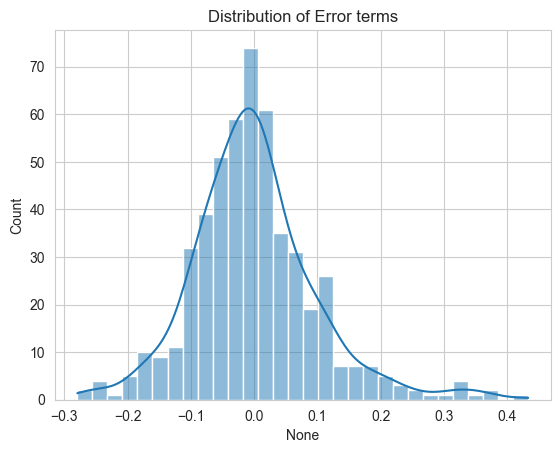

In [38]:
# checking the distribution of residuals to understand if our assumptions while creating the model were true or not.
y_train_pred = lr2.predict(X_train_lr)
res = y_train_pred - y_train
sns.histplot(x=res, kde=True, bins=30)
plt.title("Distribution of Error terms")
plt.show()

From the diagram, we conclude that the residual terms are normally distributed, which means our assumptions are correct while model building

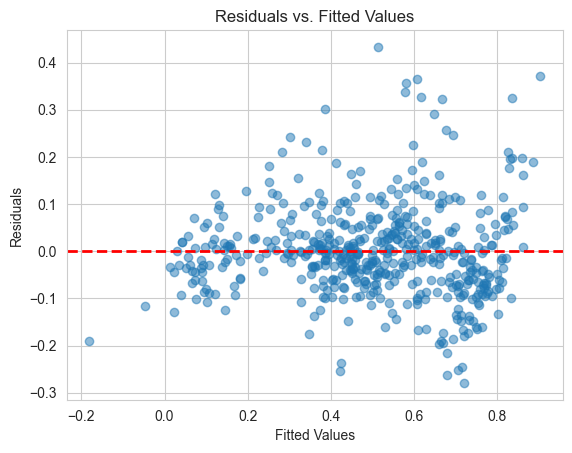

In [50]:
# Checking the homoscedacity of residuals

plt.scatter(y_train_pred, res, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference

# Customize the plot
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

There is no such pattern originating between the fitted value and residuals further indicating that our assumptions related to the model building is correct.

### Predicting the Test Data
Now, we will use lr2 as our final model and using this predict the target variable on test data.

Before fitting it, first we will use the "scaler" instance of MinMaxScaler we used to fit the train data initially.

In [39]:
# Scaling the dataset 
test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(data=test_scaled, columns=df_test.columns)
df_test_scaled.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,0.272727,0.0,1.000000,0.0,0.543115,0.536771,0.518248,0.422104,0.848606,0.0,0.0,1.0,0.0,0.0
1,0.0,0.363636,0.0,0.000000,0.0,0.758058,0.704203,0.843709,0.479765,0.526017,0.0,0.0,1.0,0.0,0.0
2,0.0,0.818182,0.0,0.000000,0.0,0.324018,0.317998,0.642765,0.386287,0.350115,0.0,0.0,0.0,0.0,1.0
3,0.0,1.000000,0.0,0.666667,1.0,0.453814,0.455552,0.780592,0.062325,0.318363,1.0,0.0,0.0,0.0,0.0
4,1.0,0.363636,0.0,0.666667,1.0,0.773634,0.724915,0.507943,0.433030,0.833877,0.0,0.0,1.0,0.0,0.0


In [40]:
# Dropping columns from the test dataset
df_test_scaled.drop(labels=['mnth','workingday','atemp'], axis=1, inplace=True)
df_test_scaled.head()

,yr,holiday,weekday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,0.0,1.000000,0.543115,0.518248,0.422104,0.848606,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.758058,0.843709,0.479765,0.526017,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.000000,0.324018,0.642765,0.386287,0.350115,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.666667,0.453814,0.780592,0.062325,0.318363,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.666667,0.773634,0.507943,0.433030,0.833877,0.0,0.0,1.0,0.0,0.0


In [41]:
# Adding the constant term in the test dataset
df_test_scaled = sm.add_constant(df_test_scaled)
df_test_scaled.head()

,const,yr,holiday,weekday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1.0,1.0,0.0,1.000000,0.543115,0.518248,0.422104,0.848606,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.000000,0.758058,0.843709,0.479765,0.526017,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.000000,0.324018,0.642765,0.386287,0.350115,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.666667,0.453814,0.780592,0.062325,0.318363,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.666667,0.773634,0.507943,0.433030,0.833877,0.0,0.0,1.0,0.0,0.0


In [42]:
# Splitting the test dataset into the dependent and indepenedent variable dataset
X_test = df_test_scaled.drop(labels='cnt', axis=1)
y_test = df_test_scaled['cnt']
X_test.shape, y_test.shape

((219, 12), (219,))

In [43]:
# Getting the y_predictions
y_test_pred = lr2.predict(X_test)

In [44]:
# Finding the r2_score on test data
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8327689649781328

So, we are getting an r2_score of 0.832 which means we are able to predict 83.2% variation in the predictor variable using the model we created which is pretty decent

Text(0, 0.5, 'y_pred')

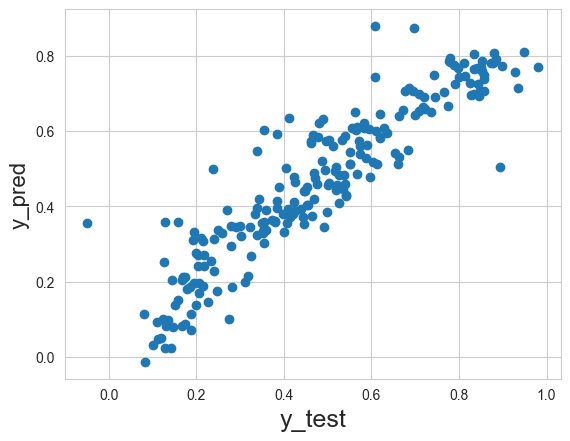

In [45]:
# Plotting the y_test_pred and y_test points in the dataset
plt.scatter(y_test, y_test_pred,)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [46]:
# Getting the model coefficients and parameters
lr2.params

const           0.128006
yr              0.237774
holiday        -0.073397
weekday         0.043694
temp            0.491416
hum            -0.128618
windspeed      -0.123399
weathersit_2   -0.056316
weathersit_3   -0.229449
season_2        0.149000
season_3        0.110965
season_4        0.199107
dtype: float64

Getting the final linear equation for the model equation:

$count=+0.13 \times const+0.24 \times yr-0.07 \times holiday+0.04 \times weekday+0.49 \times temp-0.13 \times hum\\
-0.12 \times windspeed-0.06 \times weathersit_2-0.23 \times weathersit_3+0.15 \times season_2+0.11 \times season_3+0.2 \times season_4$$

In [47]:
# Finding the mean squared error for the train prediction and the test prediction
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared error for training data prediction is {mse_train}")
print(f"Mean Squared error for test data prediction is {mse_test}")
print(f"r2_score for training data prediction is {r2_train}")
print(f"r2_score for test data prediction is {r2_test}")


Mean Squared error for training data prediction is 0.009716840598629872
Mean Squared error for test data prediction is 0.009044427278788597
r2_score for training data prediction is 0.8220501102103088
r2_score for test data prediction is 0.8327689649781328


The Mean squared error for the training data and the test data is almost equal to 0, meaning that the model is able to predict the variance in the train and the test data

### Summary:
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

The R-squared value of the train set is 82.2% whereas the test set has a value of 83.2% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.stomers.